In [2]:
! pip install -U networkx

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 1.6 MB 2.6 MB/s eta 0:00:01


In [3]:
# Useful starting lines
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from mixing_helpers import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Random Walks

In this exercise you will implement a simple random walk on a torus graph and will check its convergence to uniform distribution.

Torus is a 2D-grid graph and looks like a 'doughnout', as shown in the picture below. 
<img src="torus_topology.png" alt="Drawing" style="width: 200px;"/>

**Note:** We will use the networkx library to generate our graph. You can install this using

```bash
    pip3 install --upgrade --user networkx
```

Let's generate the probability matrix $\mathbf{G}$ of a torus graph of size $4\times 4$, note that we include self-loops too. You can play around with the code in the helpers.py to generate different graphs.

In [4]:
n_nodes = 100
A = generate_torus_adj_matrix(n_nodes)
G = A/5

Lets generate initial probabitily distribution. Recall that our walk always starts from the node 1.

In [5]:
x_init = np.zeros(n_nodes)
x_init[-1] = 1

As you will prove in Q2, probability distribution at each step evolves as $x_{t + 1} = G x_{t}$. 

In [6]:
def random_walk(G, x_init, updater, num_iter=500):
    ''' Computes probability distribution of random walk after
        num_iter steps.
        Input:
        G: mixing matrix
        x_init: initial numpy vector
        updater: function which takes in G, x and x_prev and
            returns new vector
        Output: 
        x: final estimate of probability distribution after
            num_iter steps
        errors: array of differences ||x_{t} - mu||_2^2, where
            mu is uniform distribution
    '''
    x = np.copy(x_init)
    x_prev = np.copy(x)
    errors = np.zeros(num_iter)
    mu = np.ones_like(x) / n_nodes
    for t in range(0, num_iter):
        x, x_prev = updater(G, x, x_prev), x
        errors[t] = np.linalg.norm(x - mu) ** 2
    return x, errors

Lets run our algorithm for 50 iterations and see at the final probability distribution.

Text(0, 0.5, 'probability')

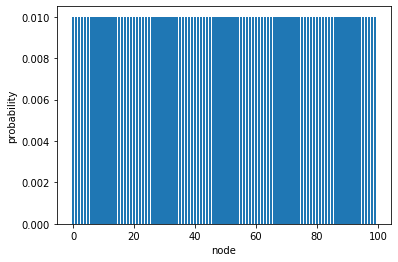

In [7]:
x, errors = random_walk(G, x_init, updater=lambda G, x, _: G@x)
x, momentum_errors = random_walk(G, x_init, updater=
                        lambda G, x, x_prev: G@x + 0.5*(x - x_prev))
x, lookahead_errors = random_walk(G, x_init, updater=
                        lambda G, x, x_prev: G@x + 0.5*(G@x - x_prev))
x, nesterov_errors = random_walk(G, x_init, updater=
                        lambda G, x, x_prev: G@(x + 0.2*(x - x_prev)))
plt.bar(np.arange(len(x)), x)
plt.xlabel("node")
plt.ylabel("probability")

We see that the final disctribution is indeed uniform. Lets now plot how fast did the algorithm converge. We will use logarithmic scale on y-axis to be able to distinguish between sublinear and linear rates.

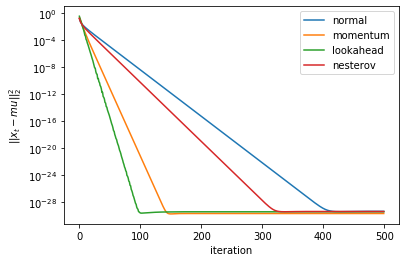

In [8]:
plt.semilogy(errors, label="normal")
plt.semilogy(momentum_errors, label="momentum")
plt.semilogy(lookahead_errors, label="lookahead")
plt.semilogy(nesterov_errors, label="nesterov")
plt.xlabel("iteration")
plt.ylabel("$||x_{t} - mu||_2^2$")
plt.legend()